## 1. Code to reproduce plots for paper

-----

Plots 

1. ph-EVP-ms

In [1]:
import datetime as dt
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import scienceplots
# from scipy.stats import mannwhitneyu, ttest_ind

In [2]:
plt.rcParams["font.family"] = "Times"
plt.rcParams.update({'font.size':16})

LEGEND_FONTSIZE=16

In [3]:
sns.color_palette(palette='bright')

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549),
 (0.9098039215686274, 0.0, 0.043137254901960784),
 (0.5450980392156862, 0.16862745098039217, 0.8862745098039215),
 (0.6235294117647059, 0.2823529411764706, 0.0),
 (0.9450980392156862, 0.2980392156862745, 0.7568627450980392),
 (0.6392156862745098, 0.6392156862745098, 0.6392156862745098),
 (1.0, 0.7686274509803922, 0.0),
 (0.0, 0.8431372549019608, 1.0)]

In [4]:
sns.set_palette('bright')

In [5]:
LANGUAGE = "RU"
LANGUAGE = "EN"

In [6]:
FOLDER = './MDPI_Plots'
if not os.path.isdir(FOLDER):
    os.makedirs(FOLDER)

In [7]:
acid_namer = {'Hydrochloric': 'HCl', 
              'Oxalic':'Щавелевая', 
              'Citric':'Лимонная', 
              'Salicylic': 'Салициловая', 
              'Benzoic': 'Бензойная'}


label_name = {'RU': 'Мин. - Медиана - Макс.', 'EN': 'Min - Median - Max'}

label_name_hline = {'RU': 'Исх. биотит', 'EN': 'In biotite'}


xlabel = {'RU': 'Дни', 'EN':'Days'}

unit_solution = {'RU':'$ммоль/л$', 'EN':'$mmol/l$'}

### Plot 1. 

In [72]:
def remove_noize(df:pd.DataFrame):
    df = df.copy()
    elemetns = ['Al', 'Ca', 'Fe', 'K', 'Mg', 'Si']
    mask = (df['days']==0)
    for element in elemetns:
        df.loc[mask, element] = df.loc[mask, element] - df.loc[~mask, element].values[0]
        df.loc[df[element]<0, element]=0
    return df

def ppm_to_mmol(df:pd.DataFrame):
    df=df.copy()
    elemetns = ['Al', 'Ca', 'Fe', 'K', 'Mg', 'Si']
    dict_AEM = {'Al':26.9,
            'Ca':40,
            'Fe':55.845, 
            'K':39,
            'Mg':24.30, 
            'Si':28}

    for element in elemetns:
        df.loc[:, element] = df.loc[:, element] / dict_AEM[element]
    return df

In [73]:
df = pd.read_excel('../data/Воробьева_25012024.xlsx', sheet_name='v2')
df = df.drop(columns=['code'])
df = ppm_to_mmol(remove_noize(df))

In [74]:
df_upd = pd.concat([df.iloc[1:, :], df.iloc[[0], :]], axis=0)

In [75]:
species_namer = {'bacteria': 'Bacteria', 
              'control':'Control', 
              'fungi':'Fungi'}

df['type'] = df['type'].apply(lambda x: species_namer[x])
df['type'].unique()

array(['Bacteria', 'Fungi', 'Control'], dtype=object)

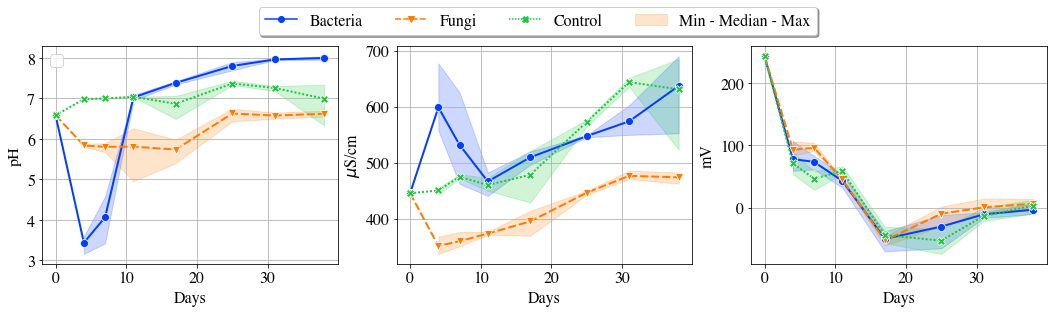

In [77]:
# settings 

estimator = 'mean'

markers=["o", "v", 'X']

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(18,4))

sns.lineplot(x='days',
                 y='рН',
                 markersize=8, 
                 markers=markers,
#                  errorbar=lambda x: (x.min(), x.max()),
                 estimator=estimator,
                 linewidth = 2,
                 data=df, 
                 style = 'type', 
                 hue='type',
             legend=False,
                 ax=ax1
                )

ax1.grid()
ax1.collections[1].set_label(label_name[LANGUAGE])
ax1.set_xlabel(xlabel[LANGUAGE])

sns.lineplot(x='days',
                 y='ЭП',
                 markersize=8, 
                 markers=markers,
#                  errorbar=lambda x: (x.min(), x.max()),
                 estimator=estimator,
                 linewidth = 2,
                 data=df, 
                 style = 'type',
                 hue='type',
                 ax=ax2
                )

ax1.legend('')

ax2.grid()
ax2.set_ylabel('${\mu}$S/cm')
# ax2.hlines(0,0,df['days'].max(), linestyles='dashed', linewidth=3, colors='grey')
ax2.collections[1].set_label(label_name[LANGUAGE])
ax2.set_xlabel(xlabel[LANGUAGE])
leg=ax2.legend(frameon=True,           
           bbox_to_anchor=(1.45, 1.22),
           fontsize=LEGEND_FONTSIZE,
           ncol=5,
           shadow=True,)


sns.lineplot(x='days',
                 y='ОВП',
                 markersize=8, 
                 markers=markers,
#                  errorbar=lambda x: (x.min(), x.max()),
                 estimator=estimator,
                 linewidth = 2,
                data=df, 
                 style = 'type', 
                 hue='type',
                 ax=ax3,
             legend=False
                )

ax3.grid()
ax3.set_ylabel('mV')

ax3.collections[1].set_label(label_name[LANGUAGE])
ax3.set_xlabel(xlabel[LANGUAGE])

fig.subplots_adjust(hspace = 0.9)
plt.savefig(os.path.join(FOLDER,'ph-OVP-eS-Bio.png'), dpi=300, bbox_inches='tight')
plt.show()


### Plot 2 

In [57]:
df = pd.read_excel('../data/data_ICP_2021_winter_2022.xlsx', sheet_name='ICP')
df_ph = pd.read_excel('../data/data_ICP_2021_winter_2022.xlsx', sheet_name='ph_ds')

dict_AEM = {'Al':26.9,
            'Ca':40,
            'Fe':55.845, 
            'K':39,
            'Mg':24.30, 
            'Si':28}

cols = ['code', 'days', 'pH', 'RedOx', 'EC']
df_ph = df_ph[cols]

df_ph=df_ph.merge(df[['parameter', 'code']], on='code', how='left')

mask = df_ph['parameter'].isna()
sel = df_ph.loc[mask].index

df_ph = df_ph.fillna(method='bfill')

df_ph.loc[:, 'RedOx'] = df_ph.loc[:, 'RedOx']+202


acid_namer = {'Hydrochloric': 'HCl', 
              'Oxalic':'Щавелевая', 
              'Citric':'Лимонная', 
              'Salicylic': 'Салициловая', 
              'Benzoic': 'Бензойная'}

df_ph['parameter_ru'] = df_ph['parameter'].apply(lambda x: acid_namer[x])

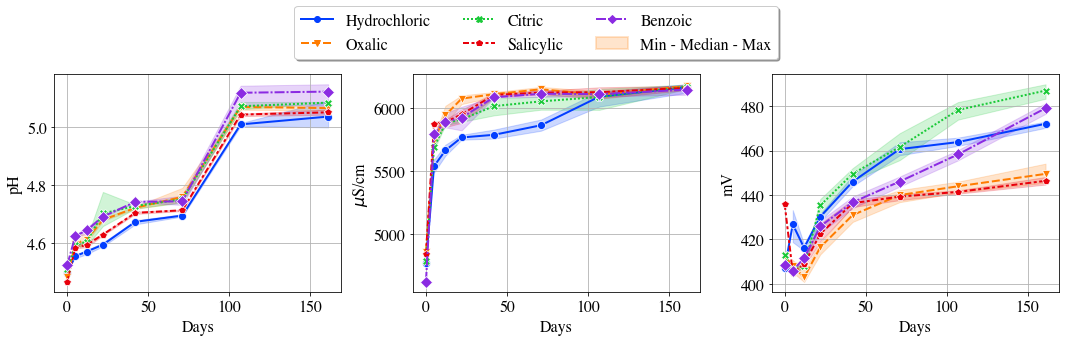

In [58]:
folder = '../plots/phys_chem/'
units = {'pH':'pH', 
         "RedOx": "mV", 
         'EC': "${\mu}$S/cm" }

fig, axes = plt.subplots(1,3, figsize=(18,4))
axes =axes.flatten()
for i, prp in enumerate(['pH', 'EC', "RedOx"]):
#     fig, ax = plt.subplots(1,1, figsize=(10,7))
    ax = axes[i]
    legend = False
    if i==1:
        legend = True
    sns.lineplot(x='days',
                 y=prp,
                 markersize=8, 
                 markers=["o", "v", 'X', "p", 'D'],
#                  errorbar=lambda x: (x.min(), x.max()),
                 estimator=estimator,
                 linewidth = 2,
                 data=df_ph, 
                 style = 'parameter', 
                 hue='parameter',
                 legend=legend,
                 ax=ax
                )
    ax.grid()
    ax.collections[1].set_label(label_name[LANGUAGE])
    if i == 1 :
        leg=ax.legend(frameon=True,           
                   bbox_to_anchor=(1.3, 1.35),
                   fontsize=LEGEND_FONTSIZE,  
                   ncol=3,
                   shadow=True)

    ax.set_ylabel(units[prp])
    ax.set_xlabel(xlabel[LANGUAGE])
    for i in leg.legendHandles:
        i.set_linewidth(2)

    fname = os.path.join(folder, f"{prp}_{LANGUAGE}.png")
fig.subplots_adjust(wspace = 0.25)
plt.savefig('./MDPI_Plots/ph-OVP-eS-aBIO.png', dpi=300, bbox_inches='tight')

### Plot 3

TO-DO

## ! Надо убрать последний график, удалить ax

In [59]:
def removeNoize(x: float, 
                acid: str,
                element: str,
               df_control: pd.DataFrame)-> float:
    """
    remove background values for each acid
    
    x: float - value in mmol/l without correction
    acid: str - kind of acid 
    element: str - element to correct
    df_control: pd.DataFrame - df with values for acids
    
    return float: corrected value
    """
    
    mask = df_control['parameter']==acid
    select = df_control.loc[mask, element]
    if len(select) == 0:
        print(acid, element)
    return x - select.values[0]

In [60]:
# Read initial dataset
df = pd.read_excel('../data/data_ICP_2021_winter_2022.xlsx', sheet_name='ICP')


# masses for elements in analysis
dict_AEM = {'Al':26.9,
            'Ca':40,
            'Fe':55.845, 
            'K':39,
            'Mg':24.30, 
            'Si':28}

cols = ['parameter', 'days', 'kind', 'code', 
        'Al', 'Ca', 'Fe', 'K', 'Mg', 'Si']
df = df[cols]


for key, value in dict_AEM.items():
    df.loc[:, key] = df.loc[:, key]/value
    
mask = df['kind']=='control'
df_control = df.loc[mask].copy()
df = df.loc[~mask].copy()
df = df.reset_index(drop=True)


for key, value in dict_AEM.items():
    df.loc[:, key] = df.loc[:, ['parameter', key]].apply(lambda x: removeNoize(x[key], 
                                                                         x['parameter'], 
                                                                         element=key,
                                                                     df_control=df_control), axis=1)
    
    
base_concetration = {"ratio_Mg_to_Si": 2.64/3.04, 
                    "ratio_Ca_to_Si": .11/3.04, 
                    "ratio_Fe_to_Si": 0.27/3.04, 
                    "ratio_Al_to_Si": 0.99/3.04,
                    "ratio_K_to_Si": 0.67/3.04,
                    "ratio_K_to_Mg": 0.67/2.64}
    
    
for element in ['Al', 'Ca', 'Fe', 'K', 'Mg']:
    df.loc[:, f'ratio_{element}_to_Si'] = df[element]/df['Si']    

In [61]:
acid_namer = {'Hydrochloric': 'HCl', 
              'Oxalic':'Щавелевая', 
              'Citric':'Лимонная', 
              'Salicylic': 'Салициловая', 
              'Benzoic': 'Бензойная'}

df['parameter_ru'] = df['parameter'].apply(lambda x: acid_namer[x])

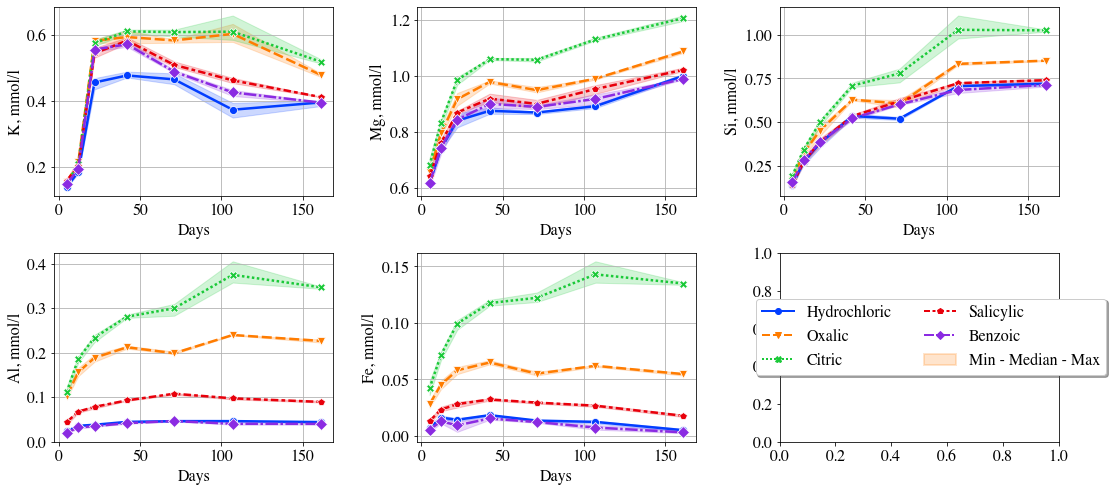

In [62]:
label_name = {'RU': 'Мин. - Медиана - Макс.', 'EN': 'Min - Median - Max'}
label_name_hline = {'RU': 'Исх. биотит', 'EN': 'In biotite'}
xlabel = {'RU': 'Дни', 'EN':'Days'}
unit_solution = {'RU':'$ммоль/л$', 'EN':'mmol/l'}
# elements=['Al', 'Ca', 'Fe', 'K', 'Mg', 'Si']
sns.color_palette(palette='bright')
elements=['K', 'Mg', 'Si', 'Al', 'Fe']
fig, axes = plt.subplots(2,3, figsize=(18,8))
axes = axes.flatten()
for i, element in enumerate(elements):
    ax = axes[i]

    legend = False
    if i==1:
        legend = True
    sns.lineplot(x='days',
                 y=element,
                 markersize=8, 
                 data=df, 
                 markers=["o", "v", 'X', "p", 'D'],
#                  errorbar=lambda x: (x.min(), x.max()),
                 estimator=estimator,
                 style = 'parameter', 
                 linewidth = 2.5,
                 hue='parameter',
                 ax=ax,
                 
                 legend = legend
                )
    ax.grid()
    ax.collections[1].set_label(label_name[LANGUAGE])
    if i == 1:
        leg=ax.legend(frameon=True,           
                   bbox_to_anchor=(2.5, -0.5),
                   fontsize=LEGEND_FONTSIZE,
                   ncol=2,
                   shadow=True,)
        for i in leg.legendHandles:
            i.set_linewidth(2)
        ax.set_zorder(5)
    ax.set_ylabel(element+', '+unit_solution[LANGUAGE])
    ax.set_xlabel(xlabel[LANGUAGE])

    if i==5:
        fig.delaxes(ax)
fig.subplots_adjust(wspace=0.3, hspace=0.3)
fname = os.path.join(FOLDER, 'Cations_Release_Acids.png')
plt.savefig(fname, dpi=300, bbox_inches='tight')
plt.show()

### Plot 4 

In [63]:
df = pd.read_excel('../data/Воробьева_25012024.xlsx')

df = df.drop(columns=['code'])

df = ppm_to_mmol(remove_noize(df))
df = df.iloc[1: , :]

df = df.drop(columns=['Ca'])

species_namer = {'bacteria': 'Bacteria', 
              'control':'Control', 
              'fungi':'Fungi'}


df['type'] = df['type'].apply(lambda x: species_namer[x])
df['type'].unique()

array(['Bacteria', 'Fungi', 'Control'], dtype=object)

In [64]:
df_melted = pd.melt(df, id_vars= ['type', 'days'],
        value_vars=['Al', 'Fe', 'K', 'Mg', 'Si', 'рН', 'ОВП','ЭП'])

In [65]:
df['type'].unique()

array(['Bacteria', 'Fungi', 'Control'], dtype=object)

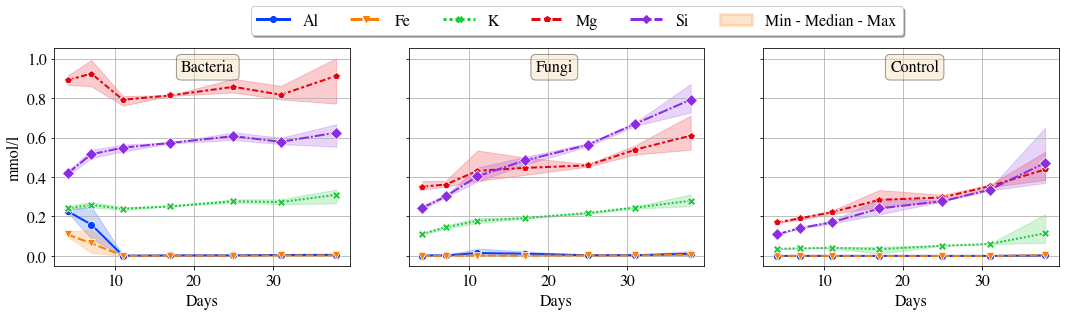

In [66]:
elements=['Al', 'Fe', 'K', 'Mg', 'Si']

fig, axes = plt.subplots(1,3, figsize=(18,4), sharey=True)
axes=axes.flatten()
for i, exp_type in enumerate(df['type'].unique()):
    
    mask = (df_melted['type'] == exp_type) & (df_melted['variable'].isin(elements))
    ax=axes[i]
    sns.lineplot(x='days',
                 y='value',
                 markersize=8, 
                 markers=["o", "v", 'X', "p", 'D'],
#                  errorbar=lambda x: (x.min(), x.max()),
                 estimator=estimator,
                 linewidth = 2,
                 data=df_melted.loc[mask], 
                 style = 'variable', 
                 hue='variable',
                 ax=ax
                )
    ax.grid()
    ax.collections[1].set_label(label_name[LANGUAGE])
    if i==0:
        leg=ax.legend(frameon=True,           
                   bbox_to_anchor=(2.9, 1.23),
                   fontsize=LEGEND_FONTSIZE,  
                   ncol=7,
                   shadow=True,)
    else:
        ax.legend('', frameon=False)
    ax.set_ylabel(unit_solution[LANGUAGE])
    ax.set_xlabel(xlabel[LANGUAGE])
    for i in leg.legendHandles:
        i.set_linewidth(3)
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.4)
    ax.text(0.43, 0.95, exp_type.capitalize(), transform=ax.transAxes, fontsize=16,
            verticalalignment='top', bbox=props)
    fname = os.path.join(folder, element+'.png')
    
fname = os.path.join(FOLDER, 'Cations_Release_Biota.png')
plt.savefig(fname,  dpi=300, bbox_inches='tight')
# fig.tight_layout()
plt.show()

### Plot 5 

In [67]:
# Read initial dataset
df = pd.read_excel('../data/data_ICP_2021_winter_2022.xlsx', sheet_name='ICP')

# masses for elements in analysis
dict_AEM = {'Al':26.9,
            'Ca':40,
            'Fe':55.845, 
            'K':39,
            'Mg':24.30, 
            'Si':28}

cols = ['parameter', 'days', 'kind', 'code', 
        'Al', 'Ca', 'Fe', 'K', 'Mg', 'Si']
df = df[cols]


for key, value in dict_AEM.items():
    df.loc[:, key] = df.loc[:, key]/value
    
mask = df['kind']=='control'
df_control = df.loc[mask].copy()
df = df.loc[~mask].copy()
df = df.reset_index(drop=True)


for key, value in dict_AEM.items():
    df.loc[:, key] = df.loc[:, ['parameter', key]].apply(lambda x: removeNoize(x[key], 
                                                                         x['parameter'], 
                                                                         element=key,
                                                                     df_control=df_control), axis=1)
    
base_concetration = {"ratio_Mg_to_Si": 2.64/3.04, 
                    "ratio_Ca_to_Si": .11/3.04, 
                    "ratio_Fe_to_Si": 0.27/3.04, 
                    "ratio_Al_to_Si": 0.99/3.04,
                    "ratio_K_to_Si": 0.67/3.04,
                    "ratio_K_to_Mg": 0.67/2.64}
    
    
for element in ['Al', 'Ca', 'Fe', 'K', 'Mg']:
    df.loc[:, f'ratio_{element}_to_Si'] = df[element]/df['Si']
    
df.loc[:, f'ratio_K_to_Mg'] = df['K']/df['Mg']

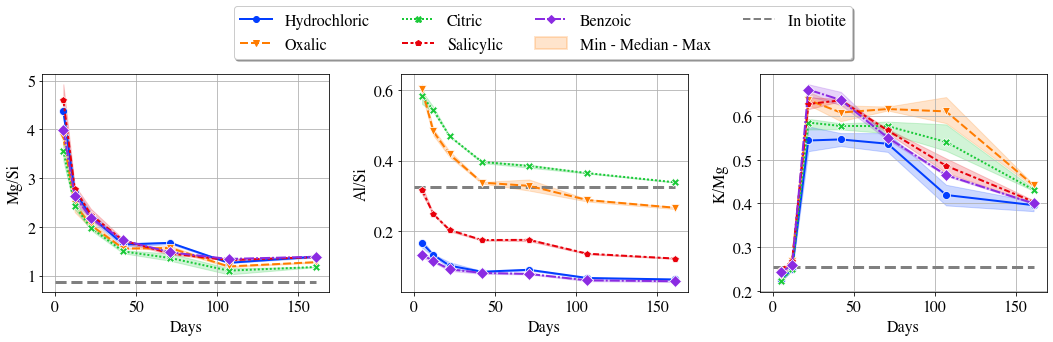

In [68]:

ratios=['ratio_Mg_to_Si','ratio_Al_to_Si', 'ratio_K_to_Mg']
annots = ['A','B', 'C']
fig, axes = plt.subplots(1,3, figsize=(18,4))
axes=axes.flatten()
for i, element in enumerate(ratios):
    ax=axes[i]
    sns.lineplot(x='days',
                 y=element,
                 marker='o',
                 markersize=8, 
                 data=df, 
                 markers=["o", "v", 'X', "p", 'D'],
#                  errorbar=lambda x: (x.min(), x.max()),
                 estimator=estimator,
                 style = 'parameter', 
                 linewidth = 2,
                 hue='parameter',
                 ax=ax
                )
    
    ax.grid()
    ax.collections[1].set_label(label_name[LANGUAGE])
    ax.hlines(y=base_concetration[element], xmin=0, xmax=161, 
              linestyles='dashed', 
              label = label_name_hline[LANGUAGE],# In biotite 
             linewidth=3, 
             color='grey')
    if i==1:
        leg=ax.legend(frameon=True,           
                     bbox_to_anchor=(1.6, 1.35),
                   fontsize=LEGEND_FONTSIZE,
                   ncol=4,
                   shadow=True)
        for i in leg.legendHandles:
            i.set_linewidth(2)
    else:
        ax.get_legend().remove()

    naming = element.split('_')[1] + '/' + element.split('_')[3]
    ax.set_ylabel(naming)
    ax.set_xlabel(xlabel[LANGUAGE])


fname = os.path.join(FOLDER, 'Ratios_acids.png')

fig.subplots_adjust(wspace = 0.25)
plt.savefig(fname,  dpi=300, bbox_inches='tight')
plt.show()

### Plot 6

In [69]:
# df = pd.read_excel('../data/Воробьева_25012024.xlsx', sheet_name='v2')
# df = df.drop(columns=['code'])
# df = ppm_to_mmol(remove_noize(df))

# df_upd = pd.concat([df.iloc[1:, :], df.iloc[[0], :]], axis=0)

df = pd.read_excel('../data/Воробьева_25012024.xlsx')

df = df.drop(columns=['code'])

df = ppm_to_mmol(remove_noize(df))
df = df.iloc[1: , :]

df = df.drop(columns=['Ca'])

species_namer = {'bacteria': 'Bacteria', 
              'control':'Control', 
              'fungi':'Fungi'}


df['type'] = df['type'].apply(lambda x: species_namer[x])
df['type'].unique()

array(['Bacteria', 'Fungi', 'Control'], dtype=object)

In [70]:
for element in ['Al', 'Fe', 'K', 'Mg']:
    df.loc[:, f'ratio_{element}_to_Si'] = df[element]/df['Si']
    
df.loc[:, 'ratio_K_to_Mg'] = df['K']/df['Mg']

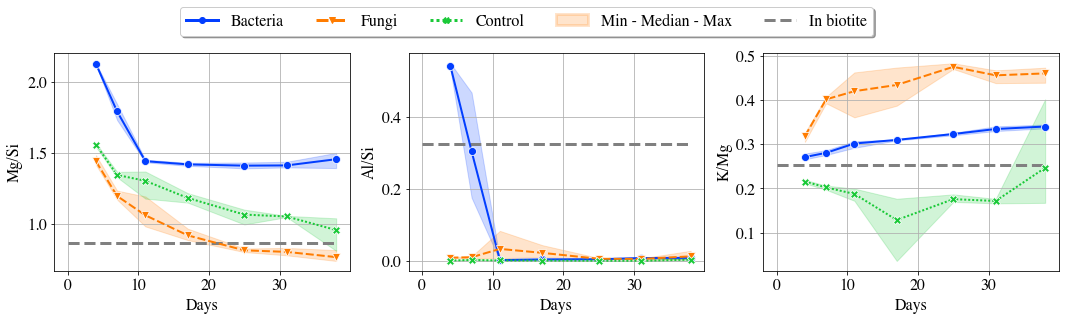

In [71]:

folder = '../plots/'
ratios=['ratio_Mg_to_Si','ratio_Al_to_Si', 'ratio_K_to_Mg']
annots = ['A','B', 'C']


fig, axes = plt.subplots(1,3, figsize=(18,4))
axes=axes.flatten()
for i, element in enumerate(ratios):
    ax=axes[i]
    sns.lineplot(x='days',
                 y=element,
                 markersize=8, 
                 markers=["o", "v", 'X'],
#                  errorbar=lambda x: (x.min(), x.max()),
                 estimator=estimator,
                 linewidth = 2,
                 data=df, 
                 style = 'type', 
                 hue='type',
                 ax=ax
                )
    
    ax.grid()
    ax.collections[1].set_label(label_name[LANGUAGE])
    ax.hlines(y=base_concetration[element], xmin=0, 
              xmax=38, 
              linestyles='dashed', 
              
              label = label_name_hline[LANGUAGE],# In biotite 
             linewidth=3, 
             color='grey', )
    if i==1:
        leg=ax.legend(frameon=True,           
                    bbox_to_anchor=(1.6, 1.25),
                   fontsize=LEGEND_FONTSIZE,  
                   ncol=5,
                   shadow=True,)
        for j in leg.legendHandles:
            j.set_linewidth(3)
    else:
        ax.get_legend().remove()

    naming = element.split('_')[1] + '/' + element.split('_')[3]
    ax.set_ylabel(naming)
    ax.set_xlabel(xlabel[LANGUAGE])
        
fname = os.path.join(FOLDER, 'Ratios_BioDissolve.png')
plt.savefig(fname,  dpi=300, bbox_inches='tight')
plt.show()
    

### End